In [72]:
%matplotlib inline
import numpy as np
from numpy import array, random, arange
import pandas as pd
from pandas import Series, DataFrame

## Step1 导入数据

**导入数据**

In [118]:
data = pd.read_csv('C:/Users/Wang/datasets/airbnb/airbnb.csv', sep=',')
data.columns

Index(['Unnamed: 0', 'title', 'price', 'rating', 'comments', 'tags',
       'discount', 'bedrooms', 'beds', 'washrooms', 'guests', 'facilities',
       'scenic_areas', 'subway_stations', 'airports', 'railway_stations'],
      dtype='object')

**处理数据**

In [119]:
data.drop(columns='Unnamed: 0', inplace=True)
data.head()

,title,price,rating,comments,tags,discount,bedrooms,beds,washrooms,guests,facilities,scenic_areas,subway_stations,airports,railway_stations
0,免服务费!三里屯､使馆区､朝阳公园地铁5分钟步行 阳光卧室Cozy Room of SANL...,￥186,4.8,149,近地铁/可以做饭/自助入住/有洗衣机,NaN,1,1,0.0,2,无线网络/厨房/洗发水/吹风机/空调/暖气/洗衣机/衣架/熨斗/电梯/烟雾报警器/一氧化碳报警器,三里屯太古里/国贸/雍和宫,朝阳公园/金台路,南苑机场/北京首都国际机场,北京火车站/北京南站/北京西站
1,利欧的房间 - 美梦,￥158,4.8,182,超赞房东/可以做饭/可存行李/有洗衣机,满3天立减2%,1,1,1.0,2,无线网络/厨房/洗发水/吹风机/生活必需品/空调/暖气/电视/洗衣机/书桌/工作区域/衣架/...,天坛/北京欢乐谷/大栅栏/前门大街,刘家窑,南苑机场/北京首都国际机场,北京火车站/北京南站/北京西站
2,【庆一周年7折优惠~】【和琅】【零压记忆棉床垫】印象影院三里屯距地铁站50米和风榻榻米私人影院公寓,￥468,5.0,155,超赞房东/近地铁/可以做饭/自助入住/付费停车/提供早餐/有洗衣机,满2天立减2%,1,2,1.0,4,无线网络/早餐/厨房/洗发水/吹风机/生活必需品/空调/暖气/电视/洗衣机/书桌/工作区域/...,三里屯太古里/国贸/雍和宫,团结湖/农业展览馆,南苑机场/北京首都国际机场,北京火车站/北京南站/北京西站
3,"王府井旁胡同里的老北京四合院之四人间A,步行到地铁站5分钟",￥100,4.6,178,超赞房东/近地铁/免费停车/有洗衣机/有烘干机,NaN,1,4,1.0,1,无线网络/吹风机/生活必需品/空调/暖气/电视/洗衣机/烘干机/衣架/熨斗/免费停车位/儿童...,NaN,NaN,NaN,NaN
4,【默居.京甲】全智能100寸投影日式和风榻榻米暖居/国贸CBD/三里屯/工体/双井,￥368,4.5,46,近地铁/可以做饭/自助入住/付费停车/有洗衣机,满7天立减5%,1,2,1.0,5,无线网络/厨房/洗发水/吹风机/生活必需品/空调/暖气/电视/洗衣机/书桌/工作区域/衣架/...,国贸/北京欢乐谷/天坛,双井/广渠门外,南苑机场/北京首都国际机场,北京火车站/北京南站/北京西站


In [120]:
# 删除无效数据
data.drop(index=data[data.iloc[:, -4:].isnull().all(axis=1)].index, inplace=True)
data[data.iloc[:, -4:].isnull().all(axis=1)]

,title,price,rating,comments,tags,discount,bedrooms,beds,washrooms,guests,facilities,scenic_areas,subway_stations,airports,railway_stations


In [121]:
data['price'] = data['price'].str.replace('￥', '').map(lambda x: np.float(x))

## Step2-A 数据探索

In [122]:
data[['price', 'rating', 'comments', 'bedrooms', 'beds', 'washrooms', 'guests']].describe()

,price,rating,comments,bedrooms,beds,washrooms,guests
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,374.401216,4.845897,79.620061,1.103343,1.376900,1.068389,2.610942
std,152.832375,0.134084,46.364328,0.324255,0.688017,0.318204,1.153204
min,1.000000,4.200000,12.000000,1.000000,1.000000,0.000000,1.000000
25%,265.000000,4.800000,49.000000,1.000000,1.000000,1.000000,2.000000
50%,348.000000,4.900000,67.000000,1.000000,1.000000,1.000000,2.000000
75%,459.000000,4.900000,101.000000,1.000000,2.000000,1.000000,3.000000
max,878.000000,5.000000,273.000000,3.000000,5.000000,3.000000,9.000000


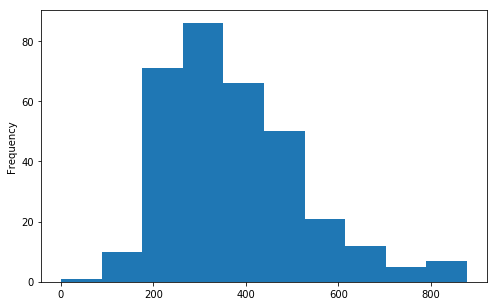

In [135]:
data.price.plot.hist(figsize=(8, 5))

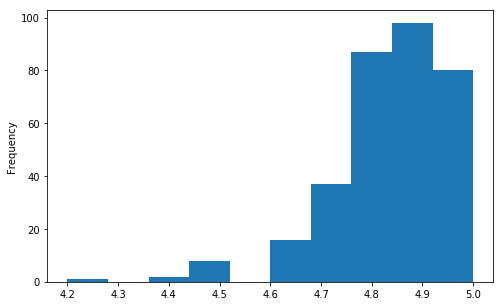

In [136]:
data.rating.plot.hist(figsize=(8, 5))

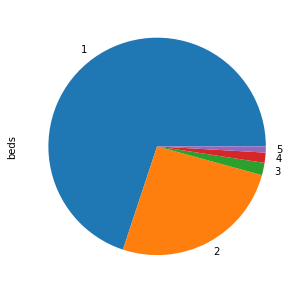

In [143]:
data.beds.value_counts().plot.pie(figsize=(5, 5))

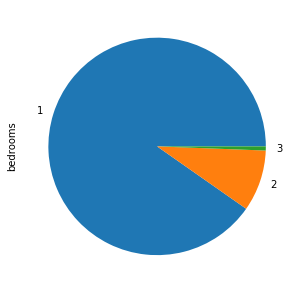

In [144]:
data.bedrooms.value_counts().plot.pie(figsize=(5, 5))

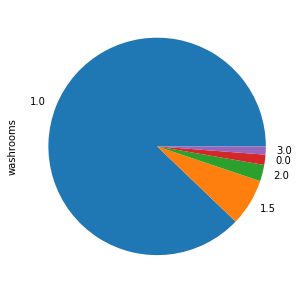

In [145]:
data.washrooms.value_counts().plot.pie(figsize=(5, 5))

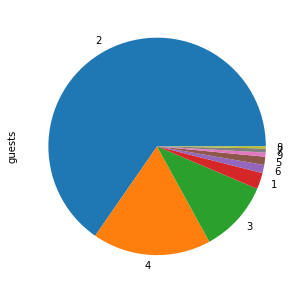

In [146]:
data.guests.value_counts().plot.pie(figsize=(5, 5))

In [138]:
data.corr()

,price,rating,comments,bedrooms,beds,washrooms,guests
price,1.000000,-0.051664,0.176885,0.490653,0.395228,0.170236,0.498285
rating,-0.051664,1.000000,0.174950,0.093931,0.013511,0.072695,0.011333
comments,0.176885,0.174950,1.000000,0.200547,0.197564,0.139809,0.111155
bedrooms,0.490653,0.093931,0.200547,1.000000,0.685832,0.256326,0.678583
beds,0.395228,0.013511,0.197564,0.685832,1.000000,0.216126,0.834770
washrooms,0.170236,0.072695,0.139809,0.256326,0.216126,1.000000,0.081038
guests,0.498285,0.011333,0.111155,0.678583,0.834770,0.081038,1.000000


In [174]:
import urllib, sys
from urllib import request

host = 'http://apifreelat.market.alicloudapi.com'
path = '/whapi/json/aliweather/briefforecast3days'
method = 'POST'
appcode = '0875727e88474254ac487fc416d1a1a9'
querys = ''
bodys = {}
url = host + path

bodys['lat'] = '''33.64'''  # 纬度
bodys['lon'] = '''116.98'''  # 经度
bodys['token'] = '''443847fa1ffd4e69d929807d42c2db1b'''
post_data = urllib.parse.urlencode(bodys).encode("utf-8")
req = request.Request(url, post_data)
req.add_header('Authorization', 'APPCODE ' + appcode)

# //根据API的要求，定义相对应的Content-Type
req.add_header('Content-Type', 'application/x-www-form-urlencoded; charset=UTF-8')
response = request.urlopen(req)
content = response.read().decode('utf-8')
if (content):
    print(content)

{"code":0,"data":{"city":{"cityId":284926,"counname":"中国","ianatimezone":"Asia\/Shanghai","name":"埇桥区","pname":"安徽省","secondaryname":"宿州市","timezone":"8"},"forecast":[{"conditionDay":"雷阵雨","conditionIdDay":"4","conditionIdNight":"31","conditionNight":"多云","humidity":"78","predictDate":"2019-08-02","tempDay":"33","tempNight":"23","updatetime":"2019-08-02 15:07:00","windDegreesDay":"90","windDegreesNight":"90","windDirDay":"东风","windDirNight":"东风","windLevelDay":"3","windLevelNight":"3"},{"conditionDay":"多云","conditionIdDay":"1","conditionIdNight":"31","conditionNight":"多云","humidity":"74","predictDate":"2019-08-03","tempDay":"33","tempNight":"23","updatetime":"2019-08-02 15:07:00","windDegreesDay":"135","windDegreesNight":"90","windDirDay":"东南风","windDirNight":"东风","windLevelDay":"3","windLevelNight":"3"},{"conditionDay":"雷阵雨","conditionIdDay":"4","conditionIdNight":"4","conditionNight":"雷阵雨","humidity":"78","predictDate":"2019-08-04","tempDay":"31","tempNight":"24","updatetime":"2019-0

In [176]:
import json
json.loads(content)

{'code': 0,
 'data': {'city': {'cityId': 284926,
   'counname': '中国',
   'ianatimezone': 'Asia/Shanghai',
   'name': '埇桥区',
   'pname': '安徽省',
   'secondaryname': '宿州市',
   'timezone': '8'},
  'forecast': [{'conditionDay': '雷阵雨',
    'conditionIdDay': '4',
    'conditionIdNight': '31',
    'conditionNight': '多云',
    'humidity': '78',
    'predictDate': '2019-08-02',
    'tempDay': '33',
    'tempNight': '23',
    'updatetime': '2019-08-02 15:07:00',
    'windDegreesDay': '90',
    'windDegreesNight': '90',
    'windDirDay': '东风',
    'windDirNight': '东风',
    'windLevelDay': '3',
    'windLevelNight': '3'},
   {'conditionDay': '多云',
    'conditionIdDay': '1',
    'conditionIdNight': '31',
    'conditionNight': '多云',
    'humidity': '74',
    'predictDate': '2019-08-03',
    'tempDay': '33',
    'tempNight': '23',
    'updatetime': '2019-08-02 15:07:00',
    'windDegreesDay': '135',
    'windDegreesNight': '90',
    'windDirDay': '东南风',
    'windDirNight': '东风',
    'windLevelDay': '3'